# **IMPORTS**

In [10]:
import pandas as pd
import numpy as np

In [11]:
!pip install gensim


In [12]:
import sklearn
print(sklearn.__version__)

1.2.2


In [13]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
!pip install scipy
import scipy.spatial.distance
help(scipy.spatial.distance.pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *, out=None, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : array_like
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulczynski1',
        'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath',
        'sqeuclidean', 'yule'.
    out : ndarray
        The output array.
        If not None, condensed distance matrix Y is stored in this array.
    **kwargs : dict, optional
        Extra arguments to `metric`: r

In [16]:
!pip install scikit-learn

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
from scipy.spatial.distance import jaccard
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
import regex as re
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import random
from sklearn.metrics.pairwise import cosine_similarity



In [ ]:
!pip install gensim

In [18]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

# **TEXT PREPROCESSING**

In [36]:
df= pd.read_csv('/content/ted_talks_en.csv')

In [38]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [39]:
#dropping the columns
columns_to_drop = ['all_speakers',
 'occupations',
 'about_speakers',
 'views',
 'recorded_date',
 'published_date',
 'event',
 'native_lang',
 'available_lang',
 'comments',
 'duration',
 'topics',
 'related_talks',]
df.drop(columns=columns_to_drop, inplace=True)

In [40]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'url', 'description', 'transcript'], dtype='object')

In [41]:
z=df['transcript']

In [42]:
df['transcript'][0]

'Thank you so much, Chris. And it\'s truly a great honor to have the opportunity to come to this stage twice; I\'m extremely grateful. I have been blown away by this conference, and I want to thank all of you for the many nice comments about what I had to say the other night. And I say that sincerely, partly because (Mock sob) I need that. (Laughter) Put yourselves in my position. (Laughter) I flew on Air Force Two for eight years. (Laughter) Now I have to take off my shoes or boots to get on an airplane! (Laughter) (Applause) I\'ll tell you one quick story to illustrate what that\'s been like for me. (Laughter) It\'s a true story — every bit of this is true. Soon after Tipper and I left the — (Mock sob) White House — (Laughter) we were driving from our home in Nashville to a little farm we have 50 miles east of Nashville. Driving ourselves. (Laughter) I know it sounds like a little thing to you, but — (Laughter) I looked in the rear-view mirror and all of a sudden it just hit me. Ther

In [190]:
def normalizetxt(txt):
 txt=txt.str.lower()
 return txt

In [193]:
txt=df['transcript']


In [44]:
df['transcript'][0]

'thank you so much, chris. and it\'s truly a great honor to have the opportunity to come to this stage twice; i\'m extremely grateful. i have been blown away by this conference, and i want to thank all of you for the many nice comments about what i had to say the other night. and i say that sincerely, partly because (mock sob) i need that. (laughter) put yourselves in my position. (laughter) i flew on air force two for eight years. (laughter) now i have to take off my shoes or boots to get on an airplane! (laughter) (applause) i\'ll tell you one quick story to illustrate what that\'s been like for me. (laughter) it\'s a true story — every bit of this is true. soon after tipper and i left the — (mock sob) white house — (laughter) we were driving from our home in nashville to a little farm we have 50 miles east of nashville. driving ourselves. (laughter) i know it sounds like a little thing to you, but — (laughter) i looked in the rear-view mirror and all of a sudden it just hit me. ther

In [192]:
def parentheticalwords(txt):
 txt = [re.sub(r'\([^)]*\)', ' ', talk) for talk in txt]
 return txt

In [46]:
df['transcript'][0]

'thank you so much, chris. and it\'s truly a great honor to have the opportunity to come to this stage twice; i\'m extremely grateful. i have been blown away by this conference, and i want to thank all of you for the many nice comments about what i had to say the other night. and i say that sincerely, partly because   i need that.   put yourselves in my position.   i flew on air force two for eight years.   now i have to take off my shoes or boots to get on an airplane!     i\'ll tell you one quick story to illustrate what that\'s been like for me.   it\'s a true story — every bit of this is true. soon after tipper and i left the —   white house —   we were driving from our home in nashville to a little farm we have 50 miles east of nashville. driving ourselves.   i know it sounds like a little thing to you, but —   i looked in the rear-view mirror and all of a sudden it just hit me. there was no motorcade back there.   you\'ve heard of phantom limb pain?   this was a rented ford tauru

In [47]:
import re
def expand_contractions(text):
  contractions_dict = {
  "ain\'t": "am not",
  "aren\'t": "are not",
  "can\'t": "cannot",
  "can\'t\'ve": "cannot have",
  "\'cause": "because",
  "could\'ve": "could have",
  "couldn\'t": "could not",
  "couldn\'t\'ve": "could not have",
  "didn\'t": "did not",
  "doesn\'t": "does not",
  "don\'t": "do not",
  "hadn\'t": "had not",
  "hadn\'t\'ve": "had not have",
  "hasn\'t": "has not",
  "haven\'t": "have not",
  "he\'d": "he would",
  "he\'d\'ve": "he would have",
  "he\'ll": "he will",
  "he\'ll\'ve": "he will have",
  "he\'s": "he is",
  "how\'d": "how did",
  "how\'d\'y": "how do you",
  "how\'ll": "how will",
  "how\'s": "how is",
  "i\'d": "i would",
  "i\'d\'ve": "i would have",
  "i\'ll": "i will",
  "i\'ll\'ve": "i will have",
  "i\'m": "i am",
  "i\'ve": "i have",
  "isn\'t": "is not",
  "it\'d": "it would",
  "it\'d\'ve": "it would have",
  "it\'ll": "it will",
  "it\'ll\'ve": "it will have",
  "it\'s": "it is",
  "let\'s": "let us",
  "ma\'am": "madam",
  "mayn\'t": "may not",
  "might\'ve": "might have",
  "mightn\'t": "might not",
  "mightn\'t\'ve": "might not have",
  "must\'ve": "must have",
  "mustn\'t": "must not",
  "mustn\'t\'ve": "must not have",
  "needn\'t": "need not",
  "needn\'t\'ve": "need not have",
  "o\'clock": "of the clock",
  "oughtn\'t": "ought not",
  "oughtn\'t\'ve": "ought not have",
  "shan\'t": "shall not",
  "sha\'n\'t": "shall not",
  "shan\'t\'ve": "shall not have",
  "she\'d": "she would",
  "she\'d\'ve": "she would have",
  "she\'ll": "she will",
  "she\'ll\'ve": "she will have",
  "she\'s": "she is",
  "should\'ve": "should have",
  "shouldn\'t": "should not",
  "shouldn\'t\'ve": "should not have",
  "so\'ve": "so have",
  "so\'s": "so is",
  "that\'d": "that would",
  "that\'d\'ve": "that would have",
  "that\'s": "that is",
  "there\'d": "there would",
  "there\'d\'ve": "there would have",
  "there\'s": "there is",
  "they\'d": "they would",
  "they\'d\'ve": "they would have",
  "they\'ll": "they will",
  "they\'ll\'ve": "they will have",
  "they\'re": "they are",
  "they\'ve": "they have",
  "to\'ve": "to have",
  "wasn\'t": "was not",
  "we\'d": "we would",
  "we\'d\'ve": "we would have",
  "we\'ll": "we will",
  "we\'ll\'ve": "we will have",
  "we\'re": "we are",
  "we\'ve": "we have",
  "weren\'t": "were not",
  "what\'ll": "what will",
  "what\'ll\'ve": "what will have",
  "what\'re": "what are",
  "what\'s": "what is",
  "what\'ve": "what have",
  "when\'s": "when is",
  "when\'ve": "when have",
  "where\'d": "where did",
  "where\'s": "where is",
  "where\'ve": "where have",
  "who\'ll": "who will",
  "who\'ll\'ve": "who will have",
  "who\'s": "who is",
  "who\'ve": "who have",
  "why\'s": "why is",
  "why\'ve": "why have",
  "will\'ve": "will have",
  "won\'t": "will not",
  "won\'t\'ve": "will not have",
  "would\'ve": "would have",
  "wouldn\'t": "would not",
  "wouldn\'t\'ve": "would not have",
  "y\'all": "you all",
  "y\'all\'d": "you all would",
  "y\'all\'d\'ve": "you all would have",
  "y\'all\'re": "you all are",
  "y\'all\'ve": "you all have",
  "you\'d": "you would",
  "you\'d\'ve": "you would have",
  "you\'ll": "you will",
  "you\'ll\'ve": "you will have",
  "you\'re": "you are",
  "you\'ve": "you have",

  }
  #  regular expression pattern matching any of the contraction words
  pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')
  # Replace contraction words with full forms
  expanded_text = pattern.sub(lambda x: contractions_dict[x.group()], text)
  return expanded_text
# Example usage:
# Assuming 'df' is your DataFrame and 'column_name' is the column containing text with contractions
df['transcript'] = df['transcript'].apply(expand_contractions)

In [48]:
df['transcript'][0]

'thank you so much, chris. and it is truly a great honor to have the opportunity to come to this stage twice; i am extremely grateful. i have been blown away by this conference, and i want to thank all of you for the many nice comments about what i had to say the other night. and i say that sincerely, partly because   i need that.   put yourselves in my position.   i flew on air force two for eight years.   now i have to take off my shoes or boots to get on an airplane!     i will tell you one quick story to illustrate what that is been like for me.   it is a true story — every bit of this is true. soon after tipper and i left the —   white house —   we were driving from our home in nashville to a little farm we have 50 miles east of nashville. driving ourselves.   i know it sounds like a little thing to you, but —   i looked in the rear-view mirror and all of a sudden it just hit me. there was no motorcade back there.   you have heard of phantom limb pain?   this was a rented ford tau

In [49]:
a=df['transcript']

In [50]:
#preprocess data
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS
stopword_list = list(STOP_WORDS)
nlp_en = spacy.load('en_core_web_lg')
stopword_list.extend(['yeah', 'ya', 'ah', 'um', 'oh', 'actually', 'literally', 'like', 'is','not','will','would', 'applause', 'laughter','am','have','s','thank','appreciate'])
def preprocess(txt):
    txt = txt.lower() #normalize text
    txt = re.sub(r'[^a-zA-Z]', ' ', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()

    docs = nlp_en(txt)
    #lemmatize and remove stopwords
    word_list = [doc.lemma_ for doc in docs if doc.text
                            not in stopword_list ]
    txt = " ".join(word_list)
    txt = txt.replace("-PRON-","")
    txt = txt.replace("PRON","")
    return txt

In [51]:
c=[preprocess(txt) for txt in a]

In [52]:
c[0]

'chris truly great honor opportunity come stage twice extremely grateful blow away conference want nice comment night sincerely partly need position fly air force year shoe boot airplane tell quick story illustrate true story bit true soon tipper leave white house drive home nashville little farm mile east nashville drive know sound little thing look rear view mirror sudden hit motorcade hear phantom limb pain rent ford taurus dinnertime started look place eat get exit lebanon tennessee get exit find shoney restaurant low cost family restaurant chain know go sit booth waitress come big commotion tipper take order go couple booth lower voice strain hear say say yes vice president al gore wife tipper man say come long way kind series epiphany day continue totally true story get g v fly africa speech nigeria city lagos topic energy begin speech tell story happen day nashville tell pretty way share tipper drive shoney low cost family restaurant chain man say laugh give speech go airport fl

In [270]:
import nltk
from nltk.corpus import words

# Download NLTK resources if not already downloaded
nltk.download('words')

# Get a set of English words from NLTK corpus
english_words = set(words.words())

def clean_user_inpu(text):
  text_lower = text.lower()
  if text_lower in df['speaker_1'].str.lower().values:  # Use .values to get a NumPy array
    clean_text = text


  else:
    # Apply the same cleaning steps as for transcripts
    text = preprocess(text)

    # Tokenize the text
    tokens = text.split()

    # Filter out non-English words
    meaningful_tokens = [token for token in tokens if token.lower() in english_words]

    # Join the filtered tokens back into a single string
    clean_text = ' '.join(meaningful_tokens)

  return clean_text

# Example usage
user_topic = input("Enter your topic of interest: ")
user_topic_clean = clean_user_inpu(user_topic)
print("Cleaned user input:", user_topic_clean)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Enter your topic of interest: city plan and infrastructure
Cleaned user input: city plan infrastructure


# **TFIDF**

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvectorizer = TfidfVectorizer(max_df= 0.6, max_features= 4000, min_df= 1, ngram_range= (1, 2))  # Adjust max_features as needed

# Create TF-IDF matrix for transcripts
tfidf_matrix = tfvectorizer.fit_transform(c)


In [220]:
feature_names = tfvectorizer.get_feature_names_out()
feature_names

array(['abandon', 'ability', 'able', ..., 'zero', 'zone', 'zoom'],
      dtype=object)

In [82]:
df['speaker_1']=df['speaker_1'].str.lower()

## COSINE SIMILARITY

In [271]:
import random
data=df
def get_tfidf_recommendations(data, tfvectorizer, tfidf_matrix, user_topic_clean, feature_names, N=10):

  # Check for single-word input not in vocabulary or empty input
  if (len(user_topic_clean.split()) == 1 and user_topic_clean not in feature_names) or len(user_topic_clean.split()) == 0:
    print("Your input word is not found. Generating random recommendations:")
    random_indices = random.sample(range(len(data)), 3)  # Get 3 random indices
    recommendations = [data.loc[i] for i in random_indices]  # Get recommendations based on indices
    for recommendation in recommendations:
      print(f"- {recommendation['title']}: {recommendation['url']}")
    return None  # Indicate no relevant recommendations

  # Check for exact speaker match (case-insensitive)
  elif user_topic_clean.lower() in data['speaker_1'].str.lower().values:
    speaker_talks = data[data['speaker_1'].str.lower().values == user_topic_clean.lower()]
    recommendations = speaker_talks[['title', 'url']]  # Get titles and URLs for recommendations
    print("Recommendations by", user_topic_clean.lower(), ":")
    for index, row in recommendations.iterrows():
      print(f"- {index+1}. {row['title']}: {row['url']}")
    return recommendations  # Return speaker-specific recommendations

  # User input topic not a speaker or single word, proceed with cosine similarity
  else:
    user_topic_vector = tfvectorizer.transform([user_topic_clean])
    cosine_similarities = cosine_similarity(user_topic_vector, tfidf_matrix)

    sorted_data = pd.DataFrame({'title': data['title'], 'url': data['url'], 'cosine_similarity': cosine_similarities[0]})
    sorted_data = sorted_data.sort_values(by='cosine_similarity', ascending=False)

    recommendations = sorted_data.head(N)
    print("Top", N, "Recommendations:")
    for index, row in recommendations.iterrows():
      print(f"{index+1}. {row['title']}: {row['url']}")
    return recommendations  # Return recommendations based on cosine similarity


recommendations = get_tfidf_recommendations(data, tfvectorizer, tfidf_matrix, user_topic_clean, feature_names)




Top 10 Recommendations:
3572. The architectural wonder of impermanent cities: https://www.ted.com/talks/rahul_mehrotra_the_architectural_wonder_of_impermanent_cities/
2567. The biggest risks facing cities -- and some solutions: https://www.ted.com/talks/robert_muggah_the_biggest_risks_facing_cities_and_some_solutions/
1599. How an obese town lost a million pounds: https://www.ted.com/talks/mick_cornett_how_an_obese_town_lost_a_million_pounds/
1804. It’s our city. Let’s fix it: https://www.ted.com/talks/alessandra_orofino_it_s_our_city_let_s_fix_it/
2520. How a video game might help us build better cities: https://www.ted.com/talks/karoliina_korppoo_how_a_video_game_might_help_us_build_better_cities/
183. A song of the city: https://www.ted.com/talks/jaime_lerner_a_song_of_the_city/
2124. How megacities are changing the map of the world: https://www.ted.com/talks/parag_khanna_how_megacities_are_changing_the_map_of_the_world/
1846. How to protect fast-growing cities from failing: https:/

# **NMF**

In [204]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=14, max_iter=500)
doc_topic = nmf_model.fit_transform(tfidf_matrix)


In [272]:

user_topic_vector_nmf = tfvectorizer.transform([user_topic_clean]).toarray()


In [205]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2", "component_3","component_4", "component_5",
                     "component_6","component_7", "component_8","component_9", "component_10", "component_11","component_12","component_13","component_14"],
             columns = tfvectorizer.get_feature_names_out())
topic_word

,abandon,ability,able,abroad,absence,absolute,absolutely,absorb,abstract,abundance,...,york,yorker,young,youth,youtube,zealand,zero,zone,zoo,zoom
component_1,0.045,0.032,0.086,0.009,0.017,0.032,0.073,0.000,0.010,0.000,...,0.111,0.023,0.220,0.046,0.003,0.001,0.006,0.032,0.006,0.000
component_2,0.002,0.030,0.085,0.000,0.007,0.033,0.015,0.036,0.010,0.006,...,0.000,0.000,0.002,0.000,0.000,0.006,0.065,0.009,0.012,0.053
component_3,0.000,0.117,0.070,0.000,0.004,0.003,0.000,0.014,0.010,0.000,...,0.000,0.000,0.000,0.004,0.000,0.000,0.013,0.005,0.000,0.022
component_4,0.003,0.032,0.062,0.017,0.004,0.024,0.035,0.000,0.000,0.013,...,0.002,0.000,0.072,0.020,0.000,0.018,0.044,0.016,0.000,0.000
component_5,0.003,0.014,0.075,0.000,0.000,0.000,0.023,0.048,0.000,0.023,...,0.000,0.000,0.003,0.000,0.000,0.019,0.007,0.074,0.020,0.005
component_6,0.000,0.000,0.019,0.005,0.005,0.000,0.009,0.003,0.000,0.000,...,0.021,0.000,0.160,0.010,0.000,0.001,0.000,0.004,0.000,0.000
component_7,0.000,0.043,0.113,0.000,0.013,0.007,0.015,0.013,0.002,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.000,0.012,0.011
component_8,0.056,0.000,0.000,0.011,0.000,0.000,0.000,0.009,0.000,0.003,...,0.179,0.032,0.038,0.030,0.000,0.000,0.012,0.027,0.000,0.008
component_9,0.000,0.037,0.070,0.011,0.011,0.000,0.017,0.001,0.000,0.000,...,0.038,0.000,0.211,0.031,0.010,0.000,0.024,0.017,0.000,0.000
component_10,0.000,0.021,0.102,0.000,0.003,0.005,0.022,0.018,0.028,0.007,...,0.090,0.005,0.000,0.000,0.000,0.002,0.006,0.004,0.000,0.023


In [206]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print(ix) #"\nTopic ",
        else:
            print(topic_names[ix]) #"\nTopic: '",    #,"'"
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [207]:
display_topics(model = nmf_model, feature_names = tfvectorizer.get_feature_names_out(),
               no_top_words=9,topic_names= [
    "Humanity",
    "Cosmos",
    "Cognition",
    "Economics",
    "Environment",
    "Sexuality",
    "Medicine",
    "Urbanism",
    "Education",
    "Design",
    "Communication",
    "Robotics",
    "Music",
    "Data Science"
] )

Humanity
feel love story man god friend ask live write
Cosmos
universe star planet galaxy earth light space energy telescope
Cognition
brain neuron memory sleep body signal behavior disorder activity
Economics
country africa government percent dollar money economic economy global
Environment
water ocean fish animal sea specie plant food earth
Sexuality
woman man girl sex gender female male sexual black
Medicine
cell cancer patient drug disease blood body health tumor
Urbanism
city car urban street building space community build neighborhood
Education
school child kid student teacher education parent girl learn
Design
design building art material project designer architecture space light
Communication
language word english speak book write speaker arabic read
Robotics
robot robotic machine ai human leg build technology intelligence
Music
music play sound song musical musician hear instrument listen
Data Science
datum computer information technology machine company internet video digital

In [153]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(5),
                             index=df['talk_id'],
                             columns = ["Humanity",
    "Cosmos",
    "Cognition",
    "Economics",
    "Environment",
    "Sexuality",
    "Medicine",
    "Urbanism",
    "Education",
    "Design",
    "Communication",
    "Robotics",
    "Music",
    "Data Science"])


In [154]:
from sklearn.manifold import TSNE
tsne = TSNE(metric='cosine')
tsne_features = tsne.fit_transform(doc_topic_nmf.iloc[:, :14])
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

In [155]:
doc_topic_nmf['Topic'] = doc_topic_nmf.idxmax(axis=1)

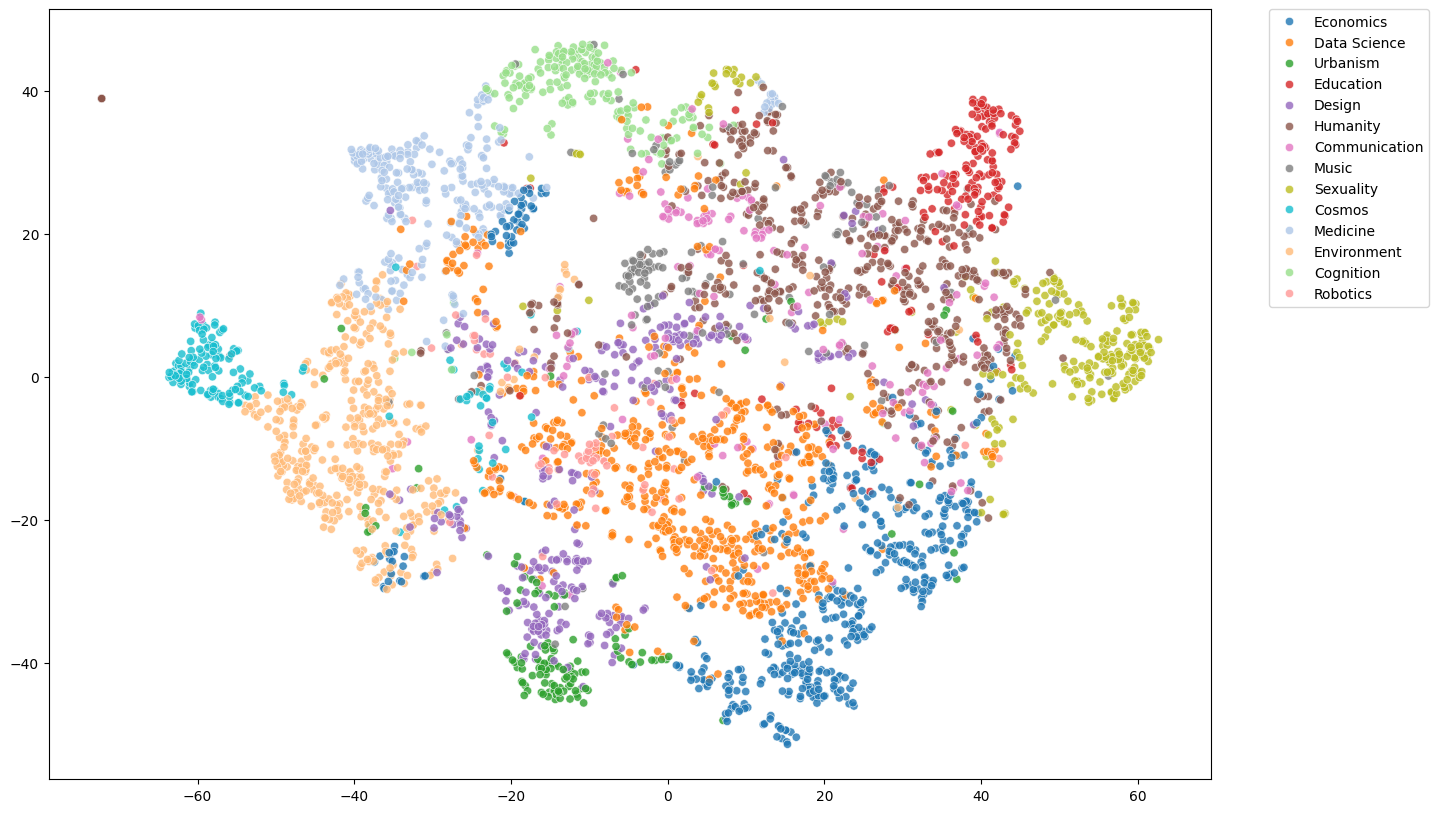

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896']


plt.figure(figsize=(15,10))
g = sns.scatterplot(
    x=xs, y=ys,
    hue='Topic',
    palette=sns.set_palette(custom_palette),
    data=doc_topic_nmf,
    legend='full',
    alpha=0.8)

lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("TSNE_Topics.svg", bbox_inches='tight');

In [274]:
user_input_vector_nmf = nmf_model.transform(tfvectorizer.transform([user_topic_clean]))

### NMF recommendation generation

In [275]:
import random
data=df
def get_recommendations_nmf(data, tfvectorizer, doc_topic, user_topic_clean, feature_names, N=10):

  # Check for single-word input not in vocabulary or empty input
  if (len(user_topic_clean.split()) == 1 and user_topic_clean not in feature_names) or len(user_topic_clean.split()) == 0:
    print("Your input word is not found. Generating random recommendations:")
    random_indices = random.sample(range(len(data)), 3)  # Get 3 random indices
    recommendations = [data.loc[i] for i in random_indices]  # Get recommendations based on indices
    for recommendation in recommendations:
      print(f"- {recommendation['title']}: {recommendation['url']}")
    return None  # Indicate no relevant recommendations

  # Check for exact speaker match (case-insensitive)
  elif user_topic_clean.lower() in data['speaker_1'].str.lower().values:
    speaker_talks = data[data['speaker_1'].str.lower().values == user_topic_clean.lower()]
    recommendations = speaker_talks[['title', 'url']]  # Get titles and URLs for recommendations
    print("Recommendations by", user_topic_clean.lower(), ":")
    for index, row in recommendations.iterrows():
      print(f"- {index+1}. {row['title']}: {row['url']}")
    return recommendations  # Return speaker-specific recommendations

  # User input topic not a speaker or single word, proceed with cosine similarity
  else:
    user_input_vector_nmf = nmf_model.transform(tfvectorizer.transform([user_topic_clean]))
    similarities = pairwise_kernels(user_input_vector_nmf, doc_topic, metric='cosine')

    # Sort transcripts based on similarity
    sorted_data_similarity = pd.DataFrame({'title': data['title'], 'url': data['url'], 'similarity': similarities[0]})
    sorted_data_similarity = sorted_data_similarity.sort_values(by='similarity', ascending=False)

    recommendations = sorted_data_similarity.head(N)
    print("Top", N, "Recommendations:")
    for index, row in recommendations.iterrows():
      print(f"{index+1}. {row['title']}: {row['url']}")
    return recommendations  # Return recommendations based on cosine similarity


recommendations = get_recommendations_nmf(data, tfvectorizer, doc_topic, user_topic_clean, feature_names,10)

user_topic_clean


Top 10 Recommendations:
1997. How to find work you love: https://www.ted.com/talks/scott_dinsmore_how_to_find_work_you_love/
3245. Can you solve the famously difficult green-eyed logic puzzle?: https://www.ted.com/talks/alex_gendler_can_you_solve_the_famously_difficult_green_eyed_logic_puzzle/
3548. How dogs help with conservation efforts: https://www.ted.com/talks/megan_parker_how_dogs_help_with_conservation_efforts/
1829. The world's most boring television ... and why it's hilariously addictive: https://www.ted.com/talks/thomas_hellum_the_world_s_most_boring_television_and_why_it_s_hilariously_addictive/
3748. How you can use impostor syndrome to your benefit: https://www.ted.com/talks/mike_cannon_brookes_how_you_can_use_impostor_syndrome_to_your_benefit/
2952. The press trampled on my privacy. Here's how I took back my story: https://www.ted.com/talks/kate_stone_the_press_trampled_on_my_privacy_here_s_how_i_took_back_my_story/
3790. How to turn off work thoughts during your free tim

'city plan infrastructure'

# **LSA**

In [175]:
from sklearn.decomposition import TruncatedSVD
# Fit LSA model
lsa_model = TruncatedSVD(n_components=8,random_state=42, n_iter=500)
lsa_doc_topic = lsa_model.fit_transform(tfidf_matrix)

In [281]:
user_input_vector_lsa = lsa_model.transform(tfvectorizer.transform([user_topic_clean]))

In [282]:
if (len(user_topic_clean.split()) == 1 and user_topic_clean not in feature_names) or len(user_topic_clean.split()) == 0:
    print("Your input word is not found. Generating random recommendations:")
    random_indices = random.sample(range(len(data)), 3)  # Get 3 random indices
    recommendations = [data.loc[i] for i in random_indices]  # Get recommendations based on indices
    for recommendation in recommendations:
      print(f"- {recommendation['title']}: {recommendation['url']}")


  # Check for exact speaker match (case-insensitive)
elif user_topic_clean.lower() in data['speaker_1'].str.lower().values:
    speaker_talks = data[data['speaker_1'].str.lower().values == user_topic_clean.lower()]
    recommendations = speaker_talks[['title', 'url']]  # Get titles and URLs for recommendations
    print("Recommendations by", user_topic_clean.lower(), ":")
    for index, row in recommendations.iterrows():
      print(f"- {index+1}. {row['title']}: {row['url']}")
   # Return speaker-specific recommendations

  # User input topic not a speaker or single word, proceed with cosine similarity
else:
    # Calculate cosine similarity between user input vector and document vectors
    similarities_lsa = pairwise_kernels(user_input_vector_lsa, lsa_doc_topic, metric='cosine')

    # Sort documents based on similarity
    sorted_data_similarity_lsa = pd.DataFrame({'title': data['title'], 'url': data['url'], 'similarity': similarities_lsa[0]})
    sorted_data_similarity_lsa = sorted_data_similarity_lsa.sort_values(by='similarity', ascending=False)

    # Define number of recommendations (e.g., N=10)
    N = 10

    # Get top N recommendations
    recommendations_similarity_lsa = sorted_data_similarity_lsa.head(N)

    # Print recommendations
    print("Top", N, "Recommendations using LSA:")
    for index, row in recommendations_similarity_lsa.iterrows():
        print(f"{index+1}. {row['title']}: {row['url']}")


Top 10 Recommendations using LSA:
3572. The architectural wonder of impermanent cities: https://www.ted.com/talks/rahul_mehrotra_the_architectural_wonder_of_impermanent_cities/
183. A song of the city: https://www.ted.com/talks/jaime_lerner_a_song_of_the_city/
1599. How an obese town lost a million pounds: https://www.ted.com/talks/mick_cornett_how_an_obese_town_lost_a_million_pounds/
1752. How I brought a river, and my city, back to life: https://www.ted.com/talks/aziza_chaouni_how_i_brought_a_river_and_my_city_back_to_life/
1778. How to reinvent the apartment building: https://www.ted.com/talks/moshe_safdie_how_to_reinvent_the_apartment_building/
1164. The 4 commandments of cities: https://www.ted.com/talks/eduardo_paes_the_4_commandments_of_cities/
2520. How a video game might help us build better cities: https://www.ted.com/talks/karoliina_korppoo_how_a_video_game_might_help_us_build_better_cities/
2845. How we can design timeless cities for our collective future: https://www.ted.c

# **LDA**

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

# Define hyperparameters to tune
param_grid = {
    'n_components': [10,5,15],
    'learning_decay': [0.5, 0.7],
    'max_iter':[120, 100]
}

# Initialize LDA model
lda_model = LatentDirichletAllocation(random_state=42)

# Perform grid search
grid_search = GridSearchCV(lda_model, param_grid, cv=2, verbose=2)
grid_search.fit(tfidf_matrix)

# Get best hyperparameters
best_lda_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..learning_decay=0.5, max_iter=120, n_components=10; total time= 1.1min
[CV] END ..learning_decay=0.5, max_iter=120, n_components=10; total time=  33.7s
[CV] END ...learning_decay=0.5, max_iter=120, n_components=5; total time=  31.8s
[CV] END ...learning_decay=0.5, max_iter=120, n_components=5; total time=  37.9s
[CV] END ..learning_decay=0.5, max_iter=120, n_components=15; total time= 1.0min
[CV] END ..learning_decay=0.5, max_iter=120, n_components=15; total time=  52.1s
[CV] END ..learning_decay=0.5, max_iter=100, n_components=10; total time=  36.1s
[CV] END ..learning_decay=0.5, max_iter=100, n_components=10; total time=  41.4s
[CV] END ...learning_decay=0.5, max_iter=100, n_components=5; total time=  28.7s
[CV] END ...learning_decay=0.5, max_iter=100, n_components=5; total time=  34.2s
[CV] END ..learning_decay=0.5, max_iter=100, n_components=15; total time=  41.9s
[CV] END ..learning_decay=0.5, max_iter=100, n_c

In [263]:
    # Fit LDA model
    lda_model = LatentDirichletAllocation(learning_decay=0.5, max_iter= 120, n_components= 5)
    lda_doc_topic = lda_model.fit_transform(tfidf_matrix)

In [283]:
    user_input_vector_lda = lda_model.transform(tfvectorizer.transform([user_topic_clean]))


In [284]:
from sklearn.decomposition import LatentDirichletAllocation
if (len(user_topic_clean.split()) == 1 and user_topic_clean not in feature_names) or len(user_topic_clean.split()) == 0:
    print("Your input word is not found. Generating random recommendations:")
    random_indices = random.sample(range(len(data)), 3)  # Get 3 random indices
    recommendations = [data.loc[i] for i in random_indices]  # Get recommendations based on indices
    for recommendation in recommendations:
      print(f"- {recommendation['title']}: {recommendation['url']}")


  # Check for exact speaker match (case-insensitive)
elif user_topic_clean.lower() in data['speaker_1'].str.lower().values:
    speaker_talks = data[data['speaker_1'].str.lower().values == user_topic_clean.lower()]
    recommendations = speaker_talks[['title', 'url']]  # Get titles and URLs for recommendations
    print("Recommendations by", user_topic_clean.lower(), ":")
    for index, row in recommendations.iterrows():
      print(f"- {index+1}. {row['title']}: {row['url']}")


  # User input topic not a speaker or single word, proceed with LDA cosine similarity
else:

  from sklearn.decomposition import LatentDirichletAllocation

  # Fit LDA model
  lda_model = LatentDirichletAllocation(n_components=5,learning_decay=0.7, max_iter=120,random_state=42)  # Choose the number of components (topics)
  lda_doc_topic = lda_model.fit_transform(tfidf_matrix)

  # Transform user input sentence into LDA feature space
  user_input_vector_lda = lda_model.transform(tfvectorizer.transform([user_topic_clean]))

  # Calculate cosine similarity between user input vector and document vectors
  similarities_lda = pairwise_kernels(user_input_vector_lda, lda_doc_topic, metric='cosine')

  # Sort documents based on similarity
  sorted_data_similarity_lda = pd.DataFrame({'title': data['title'], 'url': data['url'], 'similarity': similarities_lda[0]})
  sorted_data_similarity_lda = sorted_data_similarity_lda.sort_values(by='similarity', ascending=False)

  # Define number of recommendations (e.g., N=10)
  N = 10

  # Get top N recommendations
  recommendations_similarity_lda = sorted_data_similarity_lda.head(N)

  # Print recommendations
  print("Top", N, "Recommendations using LDA:")
  for index, row in recommendations_similarity_lda.iterrows():
      print(f"{index+1}. {row['title']}: {row['url']}")


Top 10 Recommendations using LDA:
304. Playing invisible turntables: https://www.ted.com/talks/james_burchfield_playing_invisible_turntables/
2792. "You Found Me": https://www.ted.com/talks/helen_gillet_you_found_me/
251. "Mother of Pearl," "If I Had You": https://www.ted.com/talks/nellie_mckay_mother_of_pearl_if_i_had_you/
2906. "Interpassion" / "Ba$$in": https://www.ted.com/talks/yelle_interpassion_ba_in/
2950. "Rebelosis" / "Rebel Rock" / "Rebel on That Level": https://www.ted.com/talks/the_soul_rebels_rebelosis_rebel_rock_rebel_on_that_level/
96. "La Vie en Rose": https://www.ted.com/talks/rachelle_garniez_la_vie_en_rose/
1334. Teen wonders play bluegrass: https://www.ted.com/talks/sleepy_man_banjo_boys_teen_wonders_play_bluegrass/
2913. Can you solve the Leonardo da Vinci riddle?: https://www.ted.com/talks/tanya_khovanova_can_you_solve_the_leonardo_da_vinci_riddle/
101. "Black Men Ski": https://www.ted.com/talks/stew_black_men_ski/
631. Singing old poems to life: https://www.ted.c

# Experimentation: Other distance measures on Tfidf (Not *a* part of actual project)

## **MANHATTAN DISTANCE**

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances



# Compute Manhattan distances
manhattan_distances = manhattan_distances(user_topic_vector, tfidf_matrix)

# Now you can work with the Manhattan distances, which is an array of distances
# Each element represents the Manhattan distance between the user input and the corresponding transcript in the TF-IDF matrix
# For example, if you want to find the index of the transcript with the smallest Manhattan distance:
index_of_closest_transcript = manhattan_distances.argmin()

# The index_of_closest_transcript variable now holds the index of the transcript in the TF-IDF matrix that is closest to the user input


In [ ]:
closest_indices = manhattan_distances.argsort(axis=1)[:,:10]

# Step 2: Get the titles corresponding to the closest indices
closest_titles = []
for row_indices in closest_indices:
    row_titles = [df.iloc[i]['title'] for i in row_indices]
    row_urls=[df.iloc[i]['url'] for i in row_indices]
    closest_titles.append(row_titles)
    closest_titles.append(row_urls)


In [ ]:
closest_titles

NameError: name 'closest_titles' is not defined

## **JACCARD SIMILARITY**

In [ ]:
from scipy.spatial.distance import jaccard

# Vectorize user input using the same TF-IDF vectorizer
user_tfidf_vector = vectorizer.transform([user_topic_clean])

# Calculate Jaccard distance between the user input vector and each document vector
jaccard_distances = []
for doc_tfidf_vector in tfidf_matrix:
    jaccard_distance = 1 - jaccard(user_topic_vector.toarray().flatten(), doc_tfidf_vector.toarray().flatten())
    jaccard_distances.append(jaccard_distance)

# Print or use jaccard_distances as needed
print(jaccard_distances)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import squareform
import numpy as np

# Function to compute Jaccard similarity
def jaccard_similarity(X, Y):
    intersection_cardinality = len(set.intersection(*[set(X), set(Y)]))
    union_cardinality = len(set.union(*[set(X), set(Y)]))
    return intersection_cardinality / float(union_cardinality)

# Convert user topic keywords to TF-IDF vector
user_topic_vector = vectorizer.transform([user_topic_clean]).toarray()[0]

# Calculate Jaccard similarity between user topic and transcripts
jaccard_similarities = []
for tfidf_vector in tfidf_matrix.toarray():
    jaccard_similarities.append(jaccard_similarity(user_topic_vector, tfidf_vector))

# Sort transcripts based on Jaccard similarity
sorted_data = pd.DataFrame({'title': data['title'], 'url': data['url'], 'jaccard_similarity': jaccard_similarities})
sorted_data = sorted_data.sort_values(by='jaccard_similarity', ascending=False)

# Define number of recommendations (e.g., N=10)
N = 10

# Get top N recommendations
recommendations = sorted_data.head(N)

# Print recommendations
print("Top", N, "Recommendations:")
for index, row in recommendations.iterrows():
    print(f"{index+1}. {row['title']}: {row['url']}")


Top 10 Recommendations:
1826. A dance in a hurricane of paper, wind and light: https://www.ted.com/talks/aakash_odedra_a_dance_in_a_hurricane_of_paper_wind_and_light/
2030. A musical escape into a world of light and color: https://www.ted.com/talks/kaki_king_a_musical_escape_into_a_world_of_light_and_color/
2331. An electrifying acoustic guitar performance: https://www.ted.com/talks/rodrigo_y_gabriela_an_electrifying_acoustic_guitar_performance/
905. On violin and cello, "Passacaglia": https://www.ted.com/talks/robert_gupta_joshua_roman_on_violin_and_cello_passacaglia/
1394. Dance, tiny robots!: https://www.ted.com/talks/bruno_maisonnier_dance_tiny_robots/
1949. An 11-year-old prodigy performs old-school jazz: https://www.ted.com/talks/joey_alexander_an_11_year_old_prodigy_performs_old_school_jazz/
146. My magic moves: https://www.ted.com/talks/kenichi_ebina_my_magic_moves/
1199. Dancing with light: https://www.ted.com/talks/quixotic_fusion_dancing_with_light/
574. An all-star set: htt

## **HELLINGER DISTANCE**

In [ ]:
import numpy as np

# Define a function to calculate Hellinger Distance
def hellinger_distance(p, q):
    return np.sqrt(0.5 * ((np.sqrt(p) - np.sqrt(q)) ** 2).sum())

# Convert user topic keywords to TF-IDF vector
user_topic_vector = vectorizer.transform([user_topic_clean]).toarray()

# Calculate Hellinger Distance between user topic and each transcript
hellinger_distances = []
for transcript_vector in tfidf_matrix.toarray():
    distance = hellinger_distance(user_topic_vector, transcript_vector)
    hellinger_distances.append(distance)

# Convert to numpy array
hellinger_distances = np.array(hellinger_distances)

# Sort transcripts based on Hellinger Distance
sorted_data = pd.DataFrame({'title': data['title'], 'url': data['url'], 'hellinger_distance': hellinger_distances})
sorted_data = sorted_data.sort_values(by='hellinger_distance', ascending=True)  # Sort in ascending order for Hellinger distance

# Define number of recommendations (e.g., N=10)
N = 10

# Get top N recommendations
recommendations = sorted_data.head(N)

# Print recommendations
print("Top", N, "Recommendations:")
for index, row in recommendations.iterrows():
    print(f"{index+1}. {row['title']}: {row['url']}")


Top 10 Recommendations:
905. On violin and cello, "Passacaglia": https://www.ted.com/talks/robert_gupta_joshua_roman_on_violin_and_cello_passacaglia/
146. My magic moves: https://www.ted.com/talks/kenichi_ebina_my_magic_moves/
2331. An electrifying acoustic guitar performance: https://www.ted.com/talks/rodrigo_y_gabriela_an_electrifying_acoustic_guitar_performance/
1199. Dancing with light: https://www.ted.com/talks/quixotic_fusion_dancing_with_light/
2030. A musical escape into a world of light and color: https://www.ted.com/talks/kaki_king_a_musical_escape_into_a_world_of_light_and_color/
1826. A dance in a hurricane of paper, wind and light: https://www.ted.com/talks/aakash_odedra_a_dance_in_a_hurricane_of_paper_wind_and_light/
1394. Dance, tiny robots!: https://www.ted.com/talks/bruno_maisonnier_dance_tiny_robots/
1949. An 11-year-old prodigy performs old-school jazz: https://www.ted.com/talks/joey_alexander_an_11_year_old_prodigy_performs_old_school_jazz/
574. An all-star set: htt

## **KL DIVERGENCE**

In [ ]:
from sklearn.metrics.pairwise import pairwise_kernels
import numpy as np

# Calculate KL Divergence between user topic and transcripts
kl_divergences = pairwise_kernels(user_topic_vector, tfidf_matrix, metric='rbf')

# Sort transcripts based on KL Divergence
sorted_data = pd.DataFrame({'title': data['title'], 'url': data['url'], 'kl_divergence': kl_divergences[0]})
sorted_data = sorted_data.sort_values(by='kl_divergence', ascending=True)  # Since lower divergence means closer

# Define number of recommendations (e.g., N=10)
N = 10

# Get top N recommendations
recommendations = sorted_data.head(N)

# Print recommendations
print("Top", N, "Recommendations:")
for index, row in recommendations.iterrows():
    print(f"{index+1}. {row['title']}: {row['url']}")


Top 10 Recommendations:
4005. The most important anus in the ocean: https://www.ted.com/talks/cella_wright_the_most_important_anus_in_the_ocean/
1142. Inventing is the easy part. Marketing takes work: https://www.ted.com/talks/daniel_schnitzer_inventing_is_the_easy_part_marketing_takes_work/
1140. Building blocks that blink, beep and teach: https://www.ted.com/talks/ayah_bdeir_building_blocks_that_blink_beep_and_teach/
1137. The missing link to renewable energy: https://www.ted.com/talks/donald_sadoway_the_missing_link_to_renewable_energy/
3157. 3 psychological tricks to help you save money: https://www.ted.com/talks/wendy_de_la_rosa_3_psychological_tricks_to_help_you_save_money/
1133. Yup, I built a nuclear fusion reactor: https://www.ted.com/talks/taylor_wilson_yup_i_built_a_nuclear_fusion_reactor/
3160. How to make applying for jobs less painful: https://www.ted.com/talks/priyanka_jain_how_to_make_applying_for_jobs_less_painful/
3162. This is what makes employees happy at work: http

In [ ]:
# Example lists of recommendations from TF-IDF, NMF, and LSA models
tfidf_recommendations = ['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10']
nmf_recommendations = ['item1', 'item2', 'item11', 'item12', 'item13', 'item14', 'item15', 'item16', 'item17', 'item18']
lsa_recommendations = ['item1', 'item2', 'item19', 'item20', 'item21', 'item22', 'item23', 'item24', 'item25', 'item26']

# Convert recommendations to sets
tfidf_set = set(tfidf_recommendations)
nmf_set = set(nmf_recommendations)
lsa_set = set(lsa_recommendations)

# Find common recommendations among all models
common_recommendations = tfidf_set.intersection(nmf_set, lsa_set)

# Print common recommendations
print("Common Recommendations:")
for idx, item in enumerate(common_recommendations, 1):
    print(f"{idx}. {item}")
